In [178]:
#Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [146]:
file_path = 'C:\\Users\\NAVEENA\\Downloads\\house_prices.xlsx'
df = pd.read_excel(file_path)

In [147]:
print(df.dtypes)

square_feet                  int64
bedrooms                     int64
bathrooms                    int64
garage_spaces                int64
year_built                   int64
lot_size                     int64
hoa_fees                     int64
school_rating                int64
crime_rate                 float64
distance_to_city_center    float64
num_floors                   int64
has_basement                 int64
has_fireplace                int64
has_pool                     int64
price                        int64
dtype: object


In [148]:
print(df.head(10))

   square_feet  bedrooms  bathrooms  garage_spaces  year_built  lot_size  \
0         1660         2          2              1        1991     14971   
1         4572         5          2              1        1999      5933   
2         3892         1          2              0        1989      5926   
3         1266         1          3              2        1988     10379   
4         4244         1          1              1        1972      4969   
5         3971         1          1              0        2001      3965   
6         3719         1          1              0        1996      5319   
7          930         5          2              1        2012      9975   
8         2485         3          2              2        2018      8108   
9         1569         2          1              0        1992     10141   

   hoa_fees  school_rating  crime_rate  distance_to_city_center  num_floors  \
0       235              7    0.498601                37.684937           1   
1    

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_feet              1000 non-null   int64  
 1   bedrooms                 1000 non-null   int64  
 2   bathrooms                1000 non-null   int64  
 3   garage_spaces            1000 non-null   int64  
 4   year_built               1000 non-null   int64  
 5   lot_size                 1000 non-null   int64  
 6   hoa_fees                 1000 non-null   int64  
 7   school_rating            1000 non-null   int64  
 8   crime_rate               1000 non-null   float64
 9   distance_to_city_center  1000 non-null   float64
 10  num_floors               1000 non-null   int64  
 11  has_basement             1000 non-null   int64  
 12  has_fireplace            1000 non-null   int64  
 13  has_pool                 1000 non-null   int64  
 14  price                    

In [150]:
print(df.describe())

       square_feet     bedrooms    bathrooms  garage_spaces   year_built  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean   2984.633000     3.032000     1.973000       0.984000  1986.825000   
std    1185.574005     1.430742     0.821551       0.828511    20.973418   
min     803.000000     1.000000     1.000000       0.000000  1950.000000   
25%    1966.750000     2.000000     1.000000       0.000000  1968.000000   
50%    2989.000000     3.000000     2.000000       1.000000  1987.500000   
75%    3983.750000     4.000000     3.000000       2.000000  2006.000000   
max    4999.000000     5.000000     3.000000       2.000000  2022.000000   

           lot_size     hoa_fees  school_rating   crime_rate  \
count   1000.000000  1000.000000    1000.000000  1000.000000   
mean    8059.375000   238.247000       4.928000     4.909209   
std     4093.135887   144.857957       2.540723     2.897695   
min     1011.000000     0.000000       1.000000     0.01428

In [151]:
print(df.columns)

Index(['square_feet', 'bedrooms', 'bathrooms', 'garage_spaces', 'year_built',
       'lot_size', 'hoa_fees', 'school_rating', 'crime_rate',
       'distance_to_city_center', 'num_floors', 'has_basement',
       'has_fireplace', 'has_pool', 'price'],
      dtype='object')


In [152]:
train_df = pd.read_csv('test.csv')
test_df = pd.read_csv('train.csv')

In [153]:
train_df.columns
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [154]:
print(train_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [155]:
print(train_df.isna().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [156]:
print(train_df.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

In [157]:
train_df = train_df.ffill()
test_df = test_df.ffill()
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Gar2,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,MnPrv,Gar2,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,GdPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,GdPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,GdPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,700,7,2006,WD,Normal


In [158]:
print(train_df.isna().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [159]:
print(df.columns)

Index(['square_feet', 'bedrooms', 'bathrooms', 'garage_spaces', 'year_built',
       'lot_size', 'hoa_fees', 'school_rating', 'crime_rate',
       'distance_to_city_center', 'num_floors', 'has_basement',
       'has_fireplace', 'has_pool', 'price'],
      dtype='object')


In [160]:
print("Dataset Overview:")
print(df.info())
print(df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_feet              1000 non-null   int64  
 1   bedrooms                 1000 non-null   int64  
 2   bathrooms                1000 non-null   int64  
 3   garage_spaces            1000 non-null   int64  
 4   year_built               1000 non-null   int64  
 5   lot_size                 1000 non-null   int64  
 6   hoa_fees                 1000 non-null   int64  
 7   school_rating            1000 non-null   int64  
 8   crime_rate               1000 non-null   float64
 9   distance_to_city_center  1000 non-null   float64
 10  num_floors               1000 non-null   int64  
 11  has_basement             1000 non-null   int64  
 12  has_fireplace            1000 non-null   int64  
 13  has_pool                 1000 non-null   int64  
 14  price  

In [161]:
print(df.isnull().sum())

square_feet                0
bedrooms                   0
bathrooms                  0
garage_spaces              0
year_built                 0
lot_size                   0
hoa_fees                   0
school_rating              0
crime_rate                 0
distance_to_city_center    0
num_floors                 0
has_basement               0
has_fireplace              0
has_pool                   0
price                      0
dtype: int64


In [162]:
X = df[['square_feet', 'bedrooms', 'bathrooms', 'garage_spaces', 'year_built', 'lot_size',
        'hoa_fees', 'school_rating', 'crime_rate', 'distance_to_city_center', 'num_floors',
        'has_basement', 'has_fireplace', 'has_pool']]
Y = df['price']

In [163]:
X = df.drop(columns=['price'])
Y = df['price']

In [164]:
print(X)

     square_feet  bedrooms  bathrooms  garage_spaces  year_built  lot_size  \
0           1660         2          2              1        1991     14971   
1           4572         5          2              1        1999      5933   
2           3892         1          2              0        1989      5926   
3           1266         1          3              2        1988     10379   
4           4244         1          1              1        1972      4969   
..           ...       ...        ...            ...         ...       ...   
995         1550         3          1              2        2013      1734   
996         2562         5          3              0        1986      7232   
997         4720         4          3              2        1976      1798   
998         1281         5          3              0        2004      8601   
999          953         2          3              0        1978      9979   

     hoa_fees  school_rating  crime_rate  distance_to_city_cent

In [165]:
print(Y)

0      644929
1      525716
2      660085
3      840126
4      408094
        ...  
995    509174
996    676730
997    514170
998    330755
999    633963
Name: price, Length: 1000, dtype: int64


In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [167]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [168]:
Y_pred = model.predict(X_test)

In [169]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [170]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 64388518878.32
R-squared Score: -0.00


In [171]:
print('Model Coefficients:', model.coef_)

Model Coefficients: [-1.20164497e+01 -4.11563722e+03  1.31813401e+04 -1.31182647e+04
  4.85945615e+02 -1.09951961e+00  5.04843439e+01  2.56798619e+03
  3.09211108e+03 -8.38567409e+02  4.16202052e+03 -2.59970463e+04
 -8.17571233e+03 -4.05704390e+03]


In [172]:
print('Intercept:', model.intercept_)

Intercept: -369245.3840190318


In [173]:
comparison_df = pd.DataFrame({'Actual Price': Y_test.values, 'Predicted Price': Y_pred})
print(comparison_df.head())

   Actual Price  Predicted Price
0        151993    535452.126791
1        581503    564088.930262
2        146629    598479.333470
3        389604    554362.247240
4        421345    566103.919984


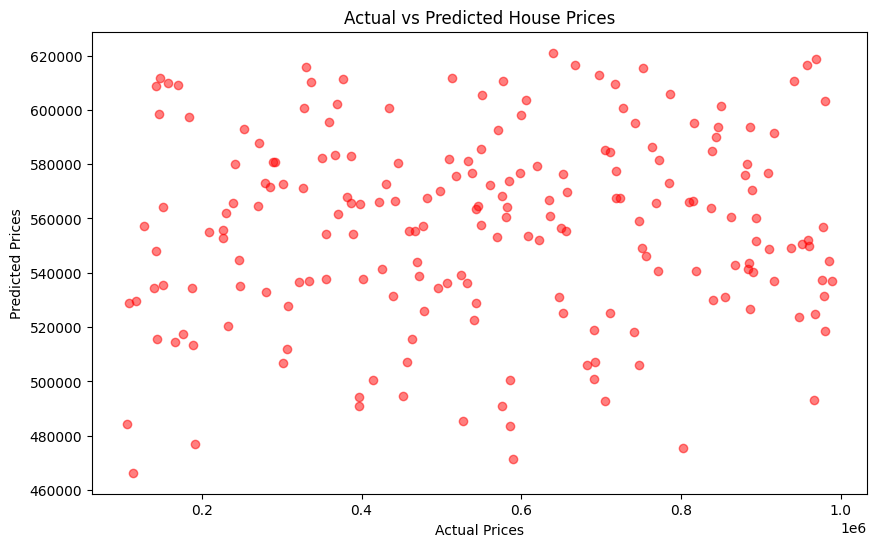

In [174]:
plt.figure(figsize=(10,6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

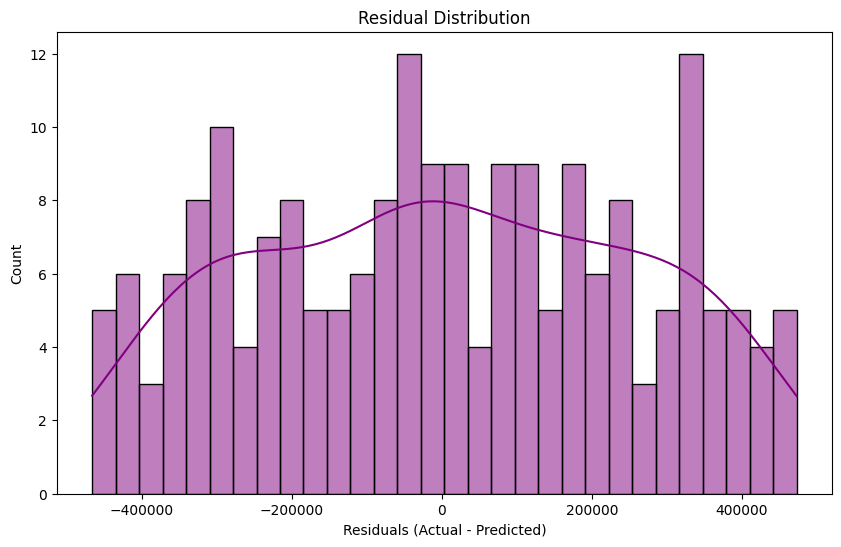

In [175]:
plt.figure(figsize=(10,6))
sns.histplot(Y_test - Y_pred, bins=30, kde=True, color='purple')
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution")
plt.show()

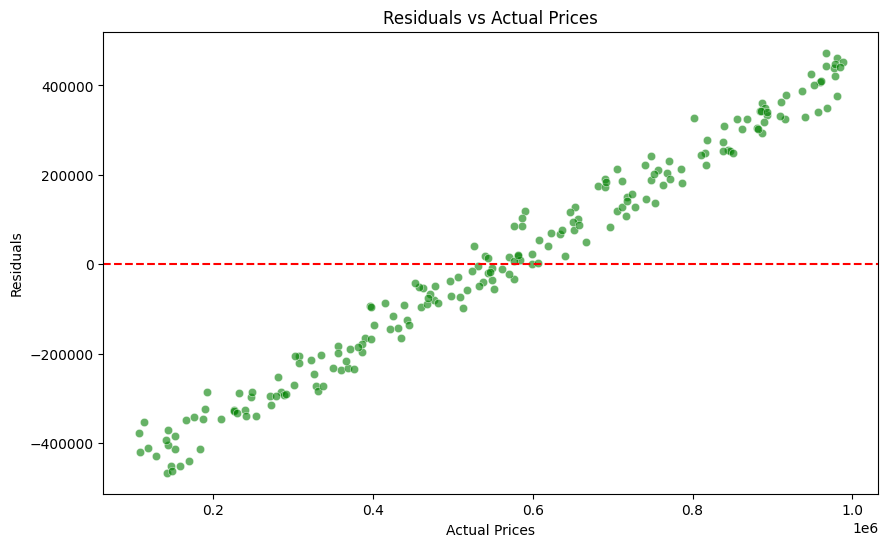

In [176]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=(Y_test - Y_pred), alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Prices")
plt.show()

In [177]:
print('Model Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Model Coefficients: [-1.20164497e+01 -4.11563722e+03  1.31813401e+04 -1.31182647e+04
  4.85945615e+02 -1.09951961e+00  5.04843439e+01  2.56798619e+03
  3.09211108e+03 -8.38567409e+02  4.16202052e+03 -2.59970463e+04
 -8.17571233e+03 -4.05704390e+03]
Intercept: -369245.3840190318
